In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('./data.txt')
X, y = data[:, :1], data[:, -1] 

In [4]:
X.shape, y.shape

((320, 1), (320,))

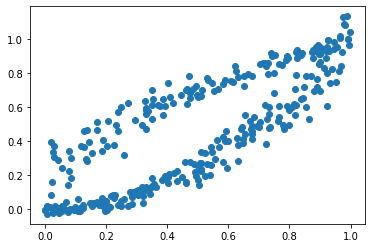

In [5]:
plt.scatter(X[:, 0], y)

\begin{eqnarray}
  \mathcal{L}(w) &=& \sum_i (w \cdot x_i - y_i) ^ 2 + \lambda \|w\|^2 =\\
    && \|X w - y\|^2 + \lambda \|w\|^2\to \min;\\
  \frac{\partial}{\partial w}\mathcal{L}(w) &=& 2 X^T (X w - y) + 2 \lambda w= 0;\\
  w &=& (X^T X + \lambda I)^{-1} X^T y.
\end{eqnarray}

In [12]:
def linear(X, y, alpha=0.1):
    C = np.matmul(X.T, X)

    C_reg_inv = np.linalg.inv(C +  alpha * np.eye(1))
    w = np.matmul(np.matmul(C_reg_inv, X.T), y)
    
    return w

In [14]:
w = linear(X, y, alpha=1.0e-6)
predictions = np.matmul(X, w)

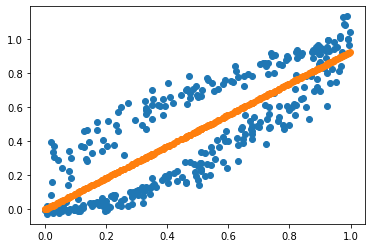

In [15]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 0], predictions)

In [16]:
def basis(X):
    n, _ = X.shape
    ones = np.ones(shape=(n, 1))
    square = np.square(X)
    log1p = np.log1p(X)
    return np.concatenate([ones, X, square, log1p], axis=1)

In [21]:
Phi = basis(X) 

In [22]:
w = linear(Phi, y, alpha=1.0e-6)
w

array([ 0.05538902, -2.85632881,  1.26760615,  3.66082032])

In [23]:
predictions = np.matmul(Phi, w)

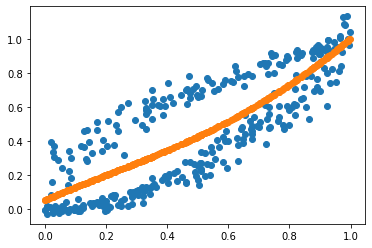

In [24]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 0], predictions)

In [25]:
errors = predictions - y

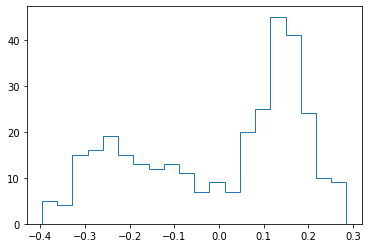

In [27]:
_ = plt.hist(errors, bins=20, histtype='step')

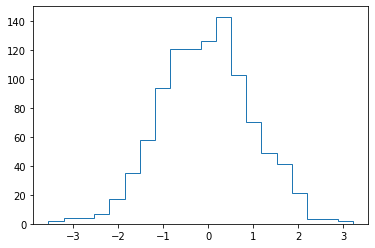

In [28]:
_ = plt.hist(np.random.normal(size=(1024, )), bins=20, histtype='step')

In [30]:
X_lower = X[X[:, 0] < y]